<a href="https://colab.research.google.com/github/FahimS45/Python_mini_projects/blob/master/Computational_Mathematics_Toolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Project on different Mathematical concepts**

In [1]:
# Importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import math

**Pascal's triangle**

In [2]:
def nChooseK(n,k):
  num = math.factorial(n)
  den = math.factorial(k) * math.factorial(n-k)

  return num/den

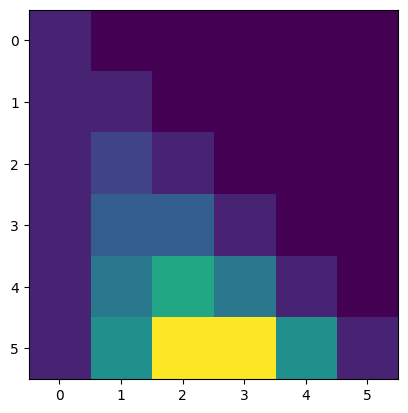

[[ 1  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 1  3  3  1  0  0]
 [ 1  4  6  4  1  0]
 [ 1  5 10 10  5  1]]


In [3]:
n = 6

PT = np.zeros((n,n),dtype=int)

for i in range(n):
  for j in range(i+1):
    PT[i,j] = nChooseK(i,j)

plt.imshow(PT)
plt.show()
print(PT)

In [4]:
for i in range(n):
  tmp = PT[i,:]
  tmp = tmp[tmp!=0]
  print(' '*(n-i) + np.array2string(tmp)[1:-1])

      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1
  1  5 10 10  5  1


**Euler's identity**

In [5]:
m = 4.3
p = np.pi/4

# Euler notation
euler = m * np.exp(1j*p)

# Rectangular notation
rect = m * (np.cos(p) + 1j*np.sin(p))

# Printing that they are the same
print(euler)
print(rect)

(3.0405591591021546+3.040559159102154j)
(3.0405591591021546+3.040559159102154j)


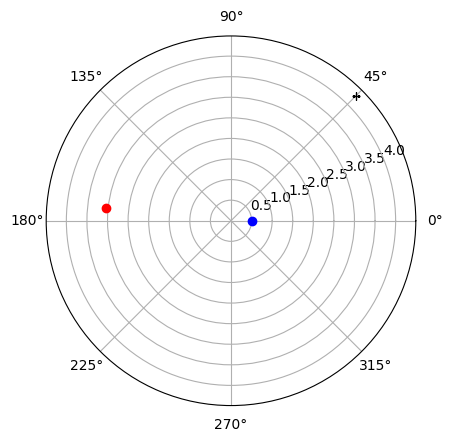

In [6]:
# In a graph

radius = np.abs(euler)
theta  = np.angle(euler)
plt.polar(theta,radius,'k+',label='Extracted')

plt.plot(np.real(euler),np.imag(euler),'ro',label='Euler')
plt.plot(0,.5,'bo')
plt.show()


1.3715


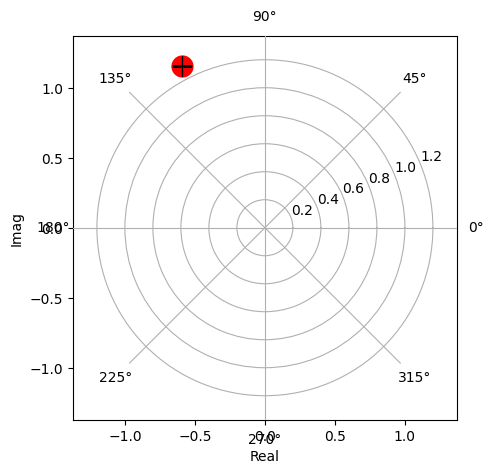

In [7]:
fig = plt.figure()

m = 1.3
p = np.pi*.65

euler = m * np.exp(1j*p)
radius = np.abs(euler)
theta  = np.angle(euler)

# Setting-up figure
ax_cart = fig.add_axes([.1,.1,.8,.8])
ax_polr = fig.add_axes([.1,.1,.8,.8],polar=True,frameon=False)

# Drawing plots
ax_polr.plot(theta,radius,'k+',markersize=15)
ax_cart.plot(np.real(euler),np.imag(euler),'ro',markersize=15)

### Adjusting the plot

# Getting radius of polar plot
r = ax_polr.get_rmax()
print(r)

ax_cart.set_xlim([-r,r])
ax_cart.set_ylim([-r,r])
ax_cart.set_aspect(1./ax_cart.get_data_ratio())
ax_cart.set_xlabel('Real')
ax_cart.set_ylabel('Imag')

plt.show()

**Fully parameterized Gaussian**

In [8]:
x = np.linspace(-10,10,1001)

def makeGauss(amp,s,offset=0):
  return amp/(s*np.sqrt(2*np.pi)) * np.exp( -(x-offset)**2 / (2*s**2))

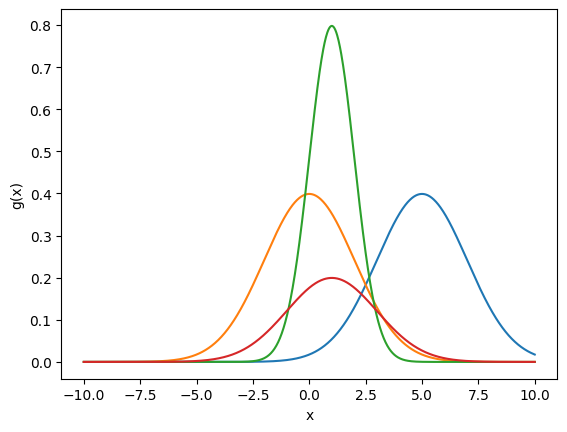

In [9]:
plt.plot(x,makeGauss(2,2,5))
plt.plot(x,makeGauss(2,2))
plt.plot(x,makeGauss(2,1,1))
plt.plot(x,makeGauss(1,2,1))

plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

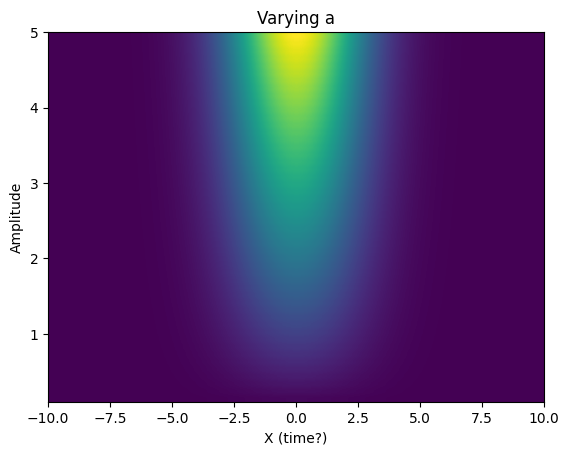

In [10]:
amps = np.linspace(.1,5,50)

G = np.zeros((len(amps),len(x)))

for a in range(len(amps)):
  G[a,:] = makeGauss(amps[a],2)

plt.imshow(G,aspect='auto',extent=[x[0],x[-1],amps[-1],amps[0]])
plt.imshow(G,aspect='auto',extent=[x[0],x[-1],amps[0],amps[-1]],origin='lower')
plt.xlabel('X (time?)')
plt.ylabel('Amplitude')
plt.title('Varying a')
plt.show()

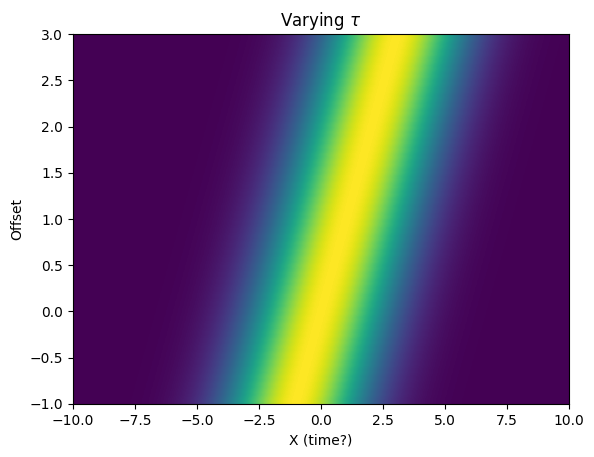

In [11]:
offsets = np.linspace(-1,3,50)

G = np.zeros((len(offsets),len(x)))

for a in range(len(offsets)):
  G[a,:] = makeGauss(1,2,offsets[a])

plt.imshow(G,aspect='auto',extent=[x[0],x[-1],offsets[0],offsets[-1]],origin='lower')
plt.xlabel('X (time?)')
plt.ylabel('Offset')
plt.title('Varying $\\tau$')
plt.show()

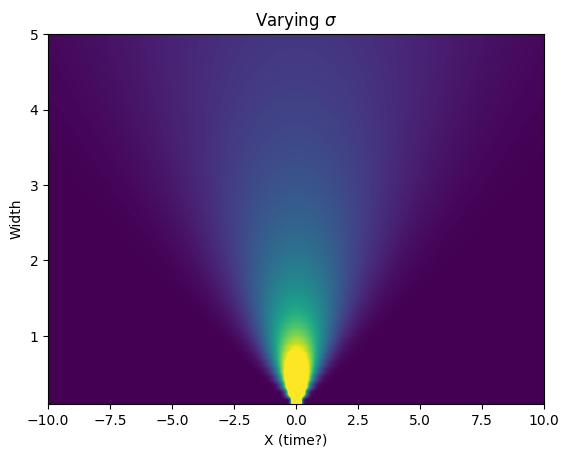

In [12]:
sds = np.linspace(.1,5,50)

G = np.zeros((len(sds),len(x)))

for a in range(len(sds)):
  G[a,:] = makeGauss(1,sds[a])

plt.imshow(G,aspect='auto',extent=[x[0],x[-1],amps[0],amps[-1]],
           vmin=0,vmax=.5,origin='lower')
plt.xlabel('X (time?)')
plt.ylabel('Width')
plt.title('Varying $\\sigma$')
plt.show()

**Time dilation in special relativity**

In [13]:
# Speed of light (mps)
c = 299792458

timedil = lambda v : 1 / np.sqrt(1-(v**2/c**2))


In [14]:
# Some speeds:
kph = np.zeros(6)

kph[0] = 100     # Car on highway
kph[1] = 200     # Crazy people on the German autobahn
kph[2] = 900     # Airplane
kph[3] = 11300   # Satellite
kph[4] = 107991  # Earth around the sun
kph[5] = 828000  # Solar system around galaxy

labels = ['car','autobahn','plane','satellite','Earth','Solar system']

In [15]:
td = np.zeros(len(kph))

for i in range(len(kph)):

    # Converting to m/s
    v = kph[i]*1000/(60*60)

    # Computing time dilation
    td[i] = timedil(v)

print(td)

[1.         1.         1.         1.         1.00000001 1.00000029]


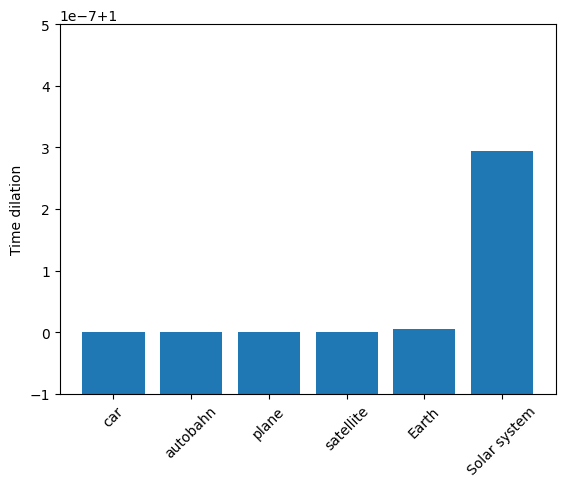

In [16]:
plt.bar(range(len(td)),td)
plt.xticks(ticks=range(len(td)),labels=labels,rotation=45)
plt.ylim([.9999999, 1.0000005])
plt.ylabel('Time dilation')
plt.show()

**Complex eigenvalues**

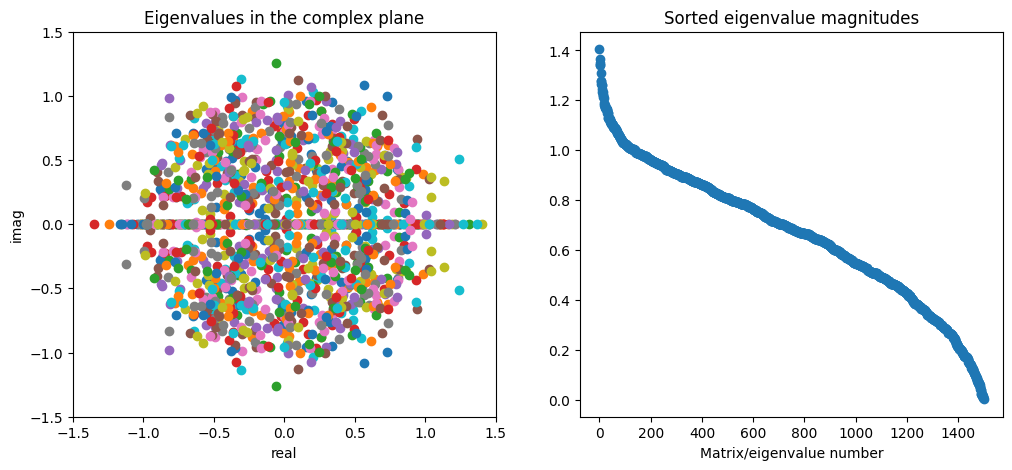

In [17]:
# Matrix size
n = 15

# Setting-up figure
fig,ax = plt.subplots(1,2,figsize=(12,5))

mags = []
for i in range(100):
  L = np.linalg.eig(np.random.randn(n,n)/np.sqrt(n))[0]
  mags = np.concatenate((mags,np.abs(L)))
  ax[0].plot(np.real(L),np.imag(L),'o')


ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,1.5)
ax[0].set_xlabel('real')
ax[0].set_ylabel('imag')
ax[0].set_title('Eigenvalues in the complex plane')

mags.sort()
ax[1].plot(mags[::-1],'o')
ax[1].set_title('Sorted eigenvalue magnitudes')
ax[1].set_xlabel('Matrix/eigenvalue number')
plt.show()